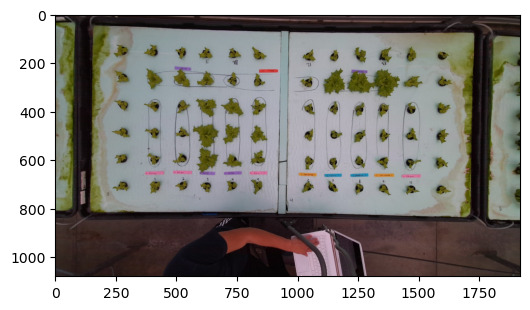

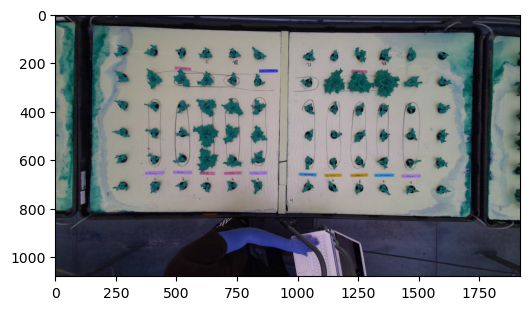

In [14]:
import sys
import cv2
import time
import numpy as np
from plantcv import plantcv as pcv  
from matplotlib import pyplot as plt

pcv.params.debug = "plot"

img, path, img_filename = pcv.readimage(filename = "./Oct-11-2022_1516_RGB_tray1.jpg", mode="rgb")

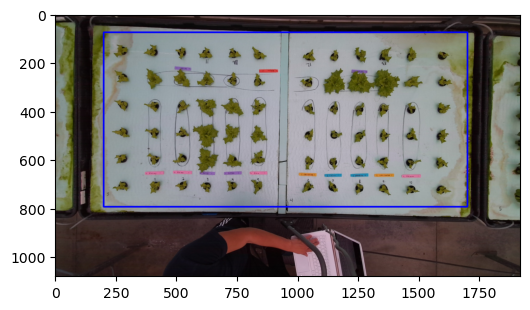

In [59]:
# # Step 2: Crop image (X and Y are starting X,Y coordinate respectively)
crop = pcv.crop(img=img, x=200, y=75, h=720, w=1500)

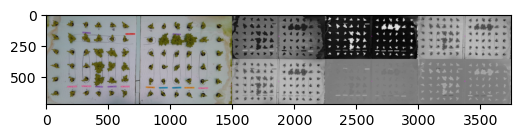

In [60]:
    # Inputs:
    # Make sure you are analizing an RGB for this to work. 
    #   rbg_img      = original image
    #   original_img = whether to include the original RGB images in the display: True (default) or False
colorspace_img = pcv.visualize.colorspaces(rgb_img=crop)


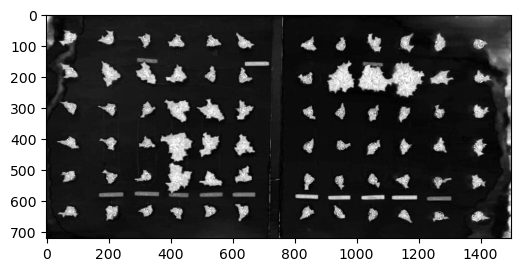

In [61]:
 # Convert the color image to a gray scale image
    # Inputs:
    #   rbg_img - original image
    #   channel - desired colorspace lab ('l', 'a', or 'b') or hsv (h,s,v)
s_img = pcv.rgb2gray_hsv(crop, channel='s')

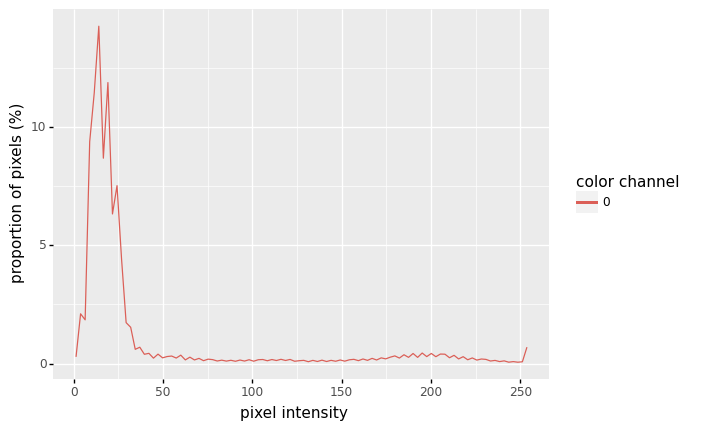

In [62]:
 hist = pcv.visualize.histogram(img=s_img)

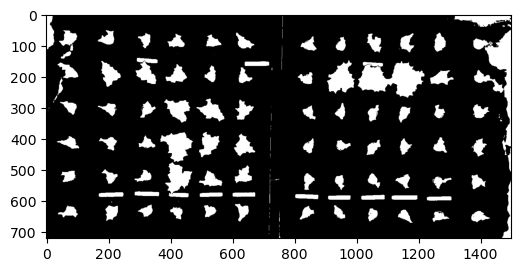

In [66]:
thresh = pcv.threshold.binary(gray_img=s_img, threshold=60, max_value=255, object_type='light')

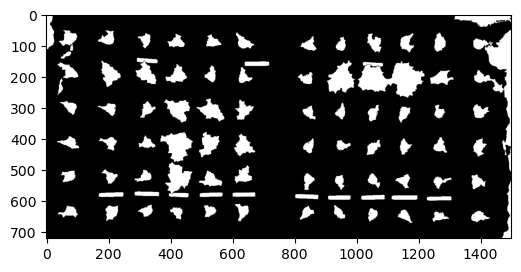

In [68]:
fill = pcv.fill(thresh, size = 100)

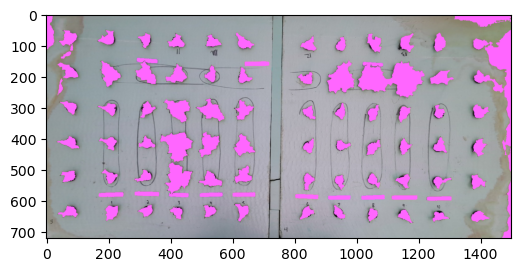

In [70]:
# we need to: either put camera closer, or cut the image
obj, obj_hierarchy = pcv.find_objects(img=crop, mask=fill)

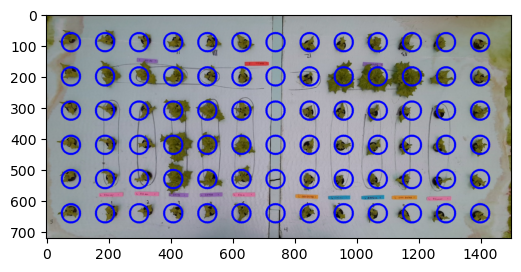

In [86]:
rois, roi_hierarchy = pcv.roi.multi(img=crop, coord=(80,90), radius=30, 
                                        spacing=(110, 110), nrows= 6, ncols=13)

In [87]:
  plant_ids = range(0, len(rois))

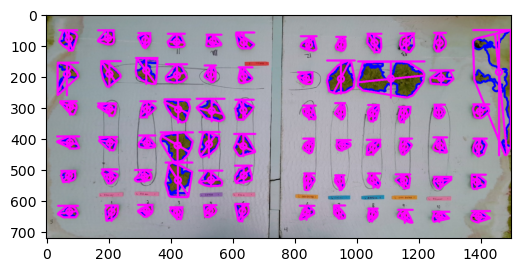

In [93]:
img_copy = np.copy(crop)
    
    # Set debug to None (plotting all of the images would be very verbose output)
pcv.params.debug = None
    
    # Create a for loop to interate through every ROI (plant) in the image
for i in range(0, len(rois)):
        # The ith ROI, ROI hierarchy, and plant ID
    roi = rois[i]
    hierarchy = roi_hierarchy[i]
    plant_id = plant_ids[i]
        # Subset objects that overlap the ROI
        # Inputs:
        #   img            = input image
        #   roi_contour    = a single ROI contour
        #   roi_hierarchy  = a single ROI hierarchy
        #   object_contour = all objects detected in a binary mask
        #   obj_hierarchy  = all object hierarchies
        #   roi_type       = "partial" (default) keeps contours that overlap
        #                    or are contained in the ROI. "cutto" cuts off
        #                    contours that fall outside the ROI. "largest"
        #                    only keeps the largest object within the ROI
    plant_contours, plant_hierarchy, mask, area = pcv.roi_objects(img=crop, 
                                                            roi_contour=roi, 
                                                            roi_hierarchy=hierarchy, 
                                                            object_contour=obj, 
                                                            obj_hierarchy=obj_hierarchy, 
                                                            roi_type="partial")
    
        # If the plant area is zero then no plant was detected for the ROI
        # and no measurements can be done
    if area > 0:
            # Combine contours together for each plant
            # Inputs:
            #   img       = input image
            #   contours  = contours that will be consolidated into a single object
            #   hierarchy = the relationship between contours
        plant_obj, plant_mask = pcv.object_composition(img=crop, 
                                            contours=plant_contours, 
                                            hierarchy=plant_hierarchy)        
            # Analyze the shape of each plant
            # Inputs:
            #   img   = input image
            #   obj   = composed object contours
            #   mask  = binary mask that contours were derived from
            #   label = a label for the group of measurements (default = "default")
        img_copy = pcv.analyze_object(img=img_copy, obj=plant_obj, 
                            mask=plant_mask, label=f"plant{plant_id}")
    
pcv.plot_image(img_copy)